# Lab 6: Clustering

In this assignment, we will learn two clustering methods: K-means and  Agglomerative method. 

Please first study the given example, which applies K-means and Agglomerative method to a toy dataset. 

Based on this example, your task is to apply K-means and Agglomerative method to the heart disease dataset. 


## 1. Example

### 1.1 Generate a toy dataset with two clusters

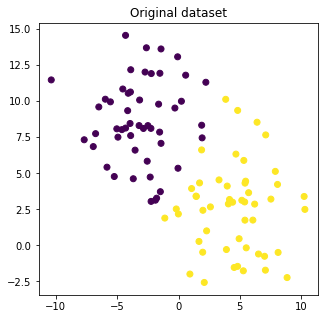

In [6]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets


# generate a toy dataset with two clusters
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=3.0, random_state=42)
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original dataset')
plt.show()

### 1.2 Partition the dataset with K-means 

Here, we use K-means method to partition this toy dataset. Then, to evaluate the clustering performance, we use two methods. The first one is to visualize the partitioned dataset. 

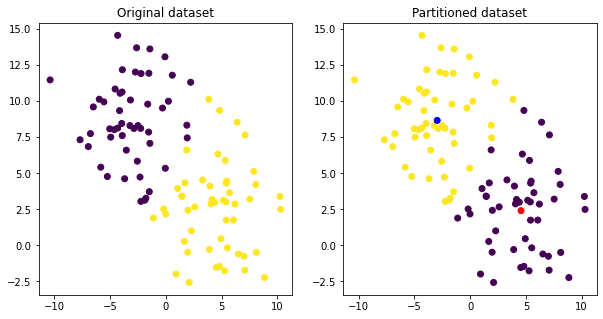

In [7]:
cluster = KMeans(n_clusters=2, random_state=0).fit(X)

centroids = cluster.cluster_centers_  #get the clustering centroids

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original dataset')

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=cluster.labels_)
plt.scatter(centroids[:, 0], centroids[:, 1], c=['r', 'b'])  #visualize the clustering centroids
plt.title('Partitioned dataset')

plt.show()



The second method to evaluate the clustering performance is to use [normalized mutual information (NMI)](https://course.ccs.neu.edu/cs6140sp15/7_locality_cluster/Assignment-6/NMI.pdf)
The larger value indicates the better performance. 


In [8]:
from sklearn.metrics.cluster import normalized_mutual_info_score

nmi = normalized_mutual_info_score(cluster.labels_, y, average_method='arithmetic')
print('The normalized mutual information score of the K-means method is {:.4f}'.format(nmi))

The normalized mutual information score of the K-means method is 0.9291


### 1.3 Partition the dataset with Agglomerative method

Then, we use the Agglomerative method to partition the toy dataset.

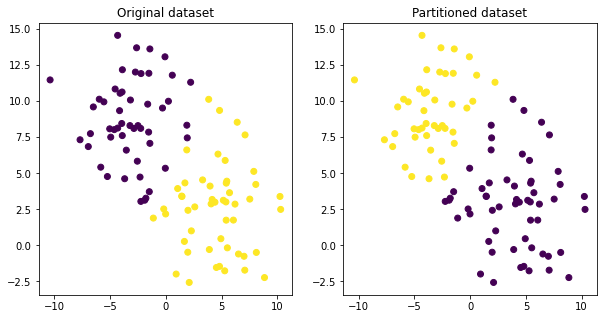

The normalized mutual information score of the Agglomerative method  is 0.6987


In [9]:
cluster = AgglomerativeClustering(n_clusters=2).fit(X)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Original dataset')

plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=cluster.labels_)
plt.title('Partitioned dataset')

plt.show()

nmi = normalized_mutual_info_score(cluster.labels_, y, average_method='arithmetic')
print('The normalized mutual information score of the Agglomerative method  is {:.4f}'.format(nmi))

## 2. Task

In this task, we still use the [heart disease](./heart.csv) dataset in Lab Assignment 5. 
Each sample has the following feature: 

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


**The task is to partition all users into two groups with K-means and Agglomerative methods.**

### 2.1 Preprocess the raw data

* Check whether there are missing values
* Check whether theare are cateogrical features


In [10]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

df = pd.read_csv('heart.csv')
print(df.isnull().sum())
print("There is no missing data")
print(df.info())
print("There are no categorical features")

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
There is no missing data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory 

### 2.2 Partition the dataset with K-means and compute its NMI


In [58]:
# your code
cluster = KMeans(n_clusters=295, random_state=0).fit(df)
features = df.drop('target', axis=1).values
targets = df['target'].values

nmi = normalized_mutual_info_score(cluster.labels_, targets, average_method='arithmetic')
print("The NMI is: {:.4f}".format(nmi))

The NMI is: 0.2122


### 2.3 Partition the dataset with Agglomerative method and compute its NMI


In [56]:
# your code
cluster = AgglomerativeClustering(n_clusters=302).fit(df)
features = df.drop('target', axis=1).values
targets = df['target'].values

nmi = normalized_mutual_info_score(cluster.labels_, targets, average_method='arithmetic')
print("The NMI is: {:.4f}".format(nmi))

The NMI is: 0.2154
